# Case study on Technical Support Data Analysis

## Problem Statement

Technical support data can often be a rich source of information on opportunities for improving customer experience. The lesser the trouble customers have with the product the better. Even better when the customers are able to overcome technical challenge quickly with minimal effort. Let us analyze the tech support data and do some basic analysis on problem types, time to resolve the problem and channel of suppor that is most suitable

### Objective

To analyze the support data and form cluster based on type of problem.

### Attributes

Variable Description:

1. PROBLEM_TYPE

2. no_of_cases

3. Avg_pending_calls

4. Avg_resol_time

5. recurrence_freq

6. Replace_percent

7. In_warranty_percent

8. Post_warranty_percent


### Table of Content

1.Import Libraries

2.Setting options

3.Read Data

4.Data Analysis and Preparation

    4.1 - Understanding the Dataset
    
    4.1.1 - Data Types

    4.1.2 - Summary Statistics

    4.1.3 - Missing Value check

    4.1.4 - Discover Outliers with Visualization

5.Univariate Analysis


6.Multivariate Analysis 
    6.1 - Visualizing features having strongest relation with target variable


7.Standardizing Data

8.Grouping data into similar clusters

9.Elbow Method

10.Creating Model

11.Conclusion and Interpretation



### Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
import warnings
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
from scipy.stats import zscore
#import sklearn.metrics

### Setting Options

In [4]:
#Suppressing warnings
warnings.filterwarnings('ignore')

### Reading data

In [54]:
#loading dataset
df = pd.read_csv('technical_support_data.csv')

### Data Analysis and Data Preparation

In [56]:
#viewing data
df.head()

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1


In [57]:
#checking dimension of data
df.shape

(23, 8)

In [58]:
#Checking attributes
df.columns

Index(['PROBLEM_TYPE', 'no_of_cases', 'Avg_pending_calls', 'Avg_resol_time',
       'recurrence_freq', 'Replace_percent', 'In_warranty_percent',
       'Post_warranty_percent'],
      dtype='object')

In [59]:
#Checking datatypes
df.dtypes

PROBLEM_TYPE              object
no_of_cases                int64
Avg_pending_calls        float64
Avg_resol_time             int64
recurrence_freq          float64
Replace_percent          float64
In_warranty_percent        int64
Post_warranty_percent      int64
dtype: object

In [60]:
#Checking null values
df.isnull().sum()

PROBLEM_TYPE             0
no_of_cases              0
Avg_pending_calls        0
Avg_resol_time           0
recurrence_freq          0
Replace_percent          0
In_warranty_percent      0
Post_warranty_percent    0
dtype: int64

In [61]:
#Checking duplicate values
df.duplicated().sum()

0

In [62]:
#Summary Statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
no_of_cases,23.0,142.782609,155.098197,3.00,23.500,72.00,211.500,520.00
Avg_pending_calls,23.0,1.973913,0.982676,1.00,1.150,2.00,2.300,4.30
Avg_resol_time,23.0,63.000000,58.877376,5.00,17.000,35.00,128.500,180.00
recurrence_freq,23.0,0.137826,0.118627,0.01,0.025,0.14,0.235,0.35
Replace_percent,23.0,0.100000,0.182109,0.00,0.000,0.00,0.130,0.70
In_warranty_percent,23.0,69.956522,37.350281,5.00,55.000,90.00,100.000,100.00
Post_warranty_percent,23.0,30.043478,37.350281,0.00,0.000,10.00,45.000,95.00


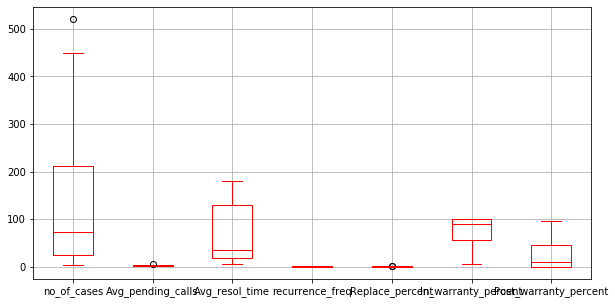

In [63]:
#Checking outliers
df.boxplot(figsize=(10,5),color='red')

### Univariate Analysis

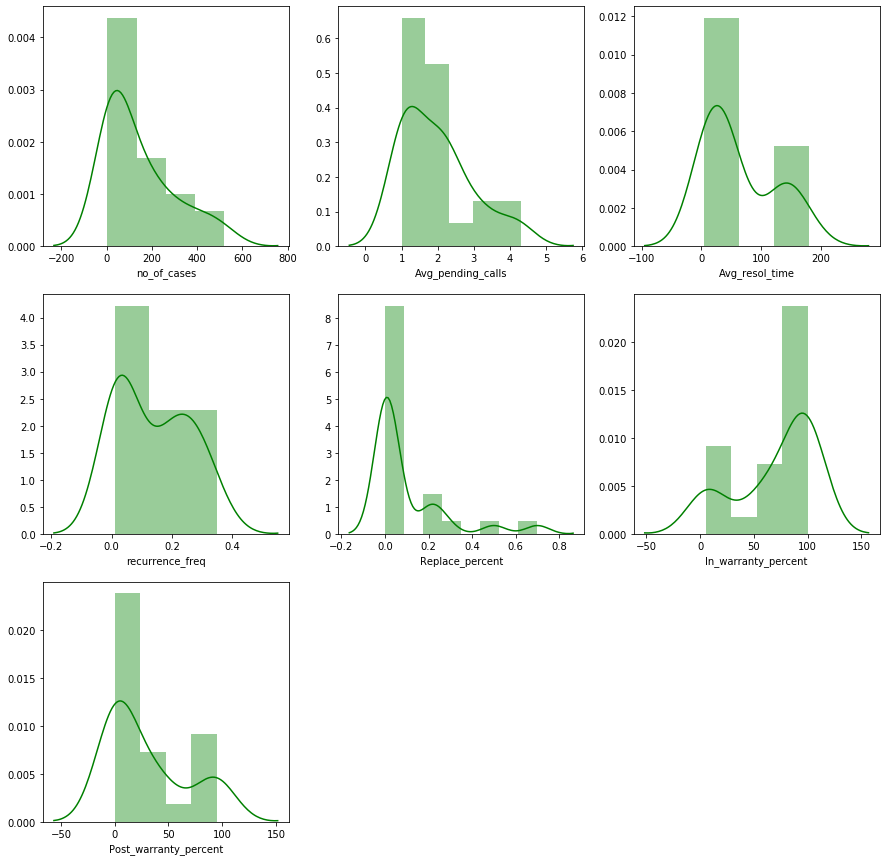

In [22]:
Cols = ['no_of_cases', 'Avg_pending_calls', 'Avg_resol_time',
       'recurrence_freq', 'Replace_percent', 'In_warranty_percent',
       'Post_warranty_percent']
pos =1
plt.figure(figsize=(15,15))
for i in Cols:
    plt.subplot(3,3,pos)
    sns.distplot(df[i],hist=True,color='green')
    pos+=1


no_of_cases : Right Skewed

Avg_pending_calls : Right Skewed

Avg_resol_time : Bimodal distributions

recurrence_freq : Bimodal distributions

Replace_percent : Multiple peaks

In_warranty_percent : Bimodal

Post_warranty_percent : Bimodal distributions


### Multivaraite Analysis

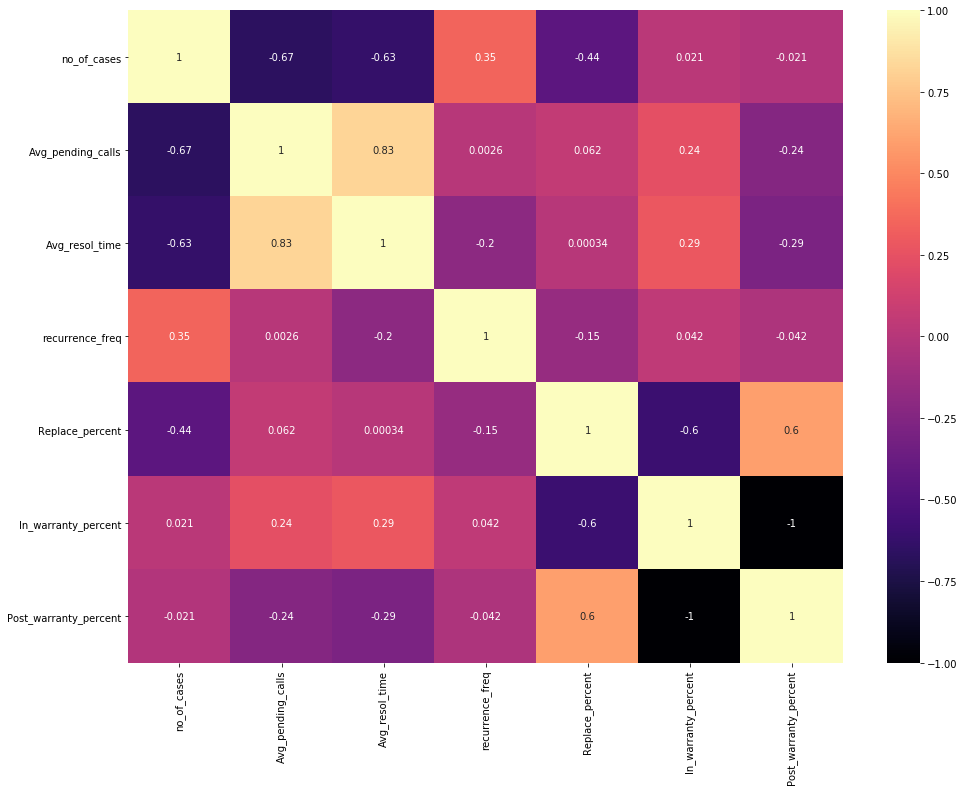

In [28]:
#chekcing correlation between independent varaibles
cor = df.corr()
plt.figure(figsize=(16,12))
sns.heatmap(cor, xticklabels=cor.columns, yticklabels= cor.columns,annot= True,cmap='magma')

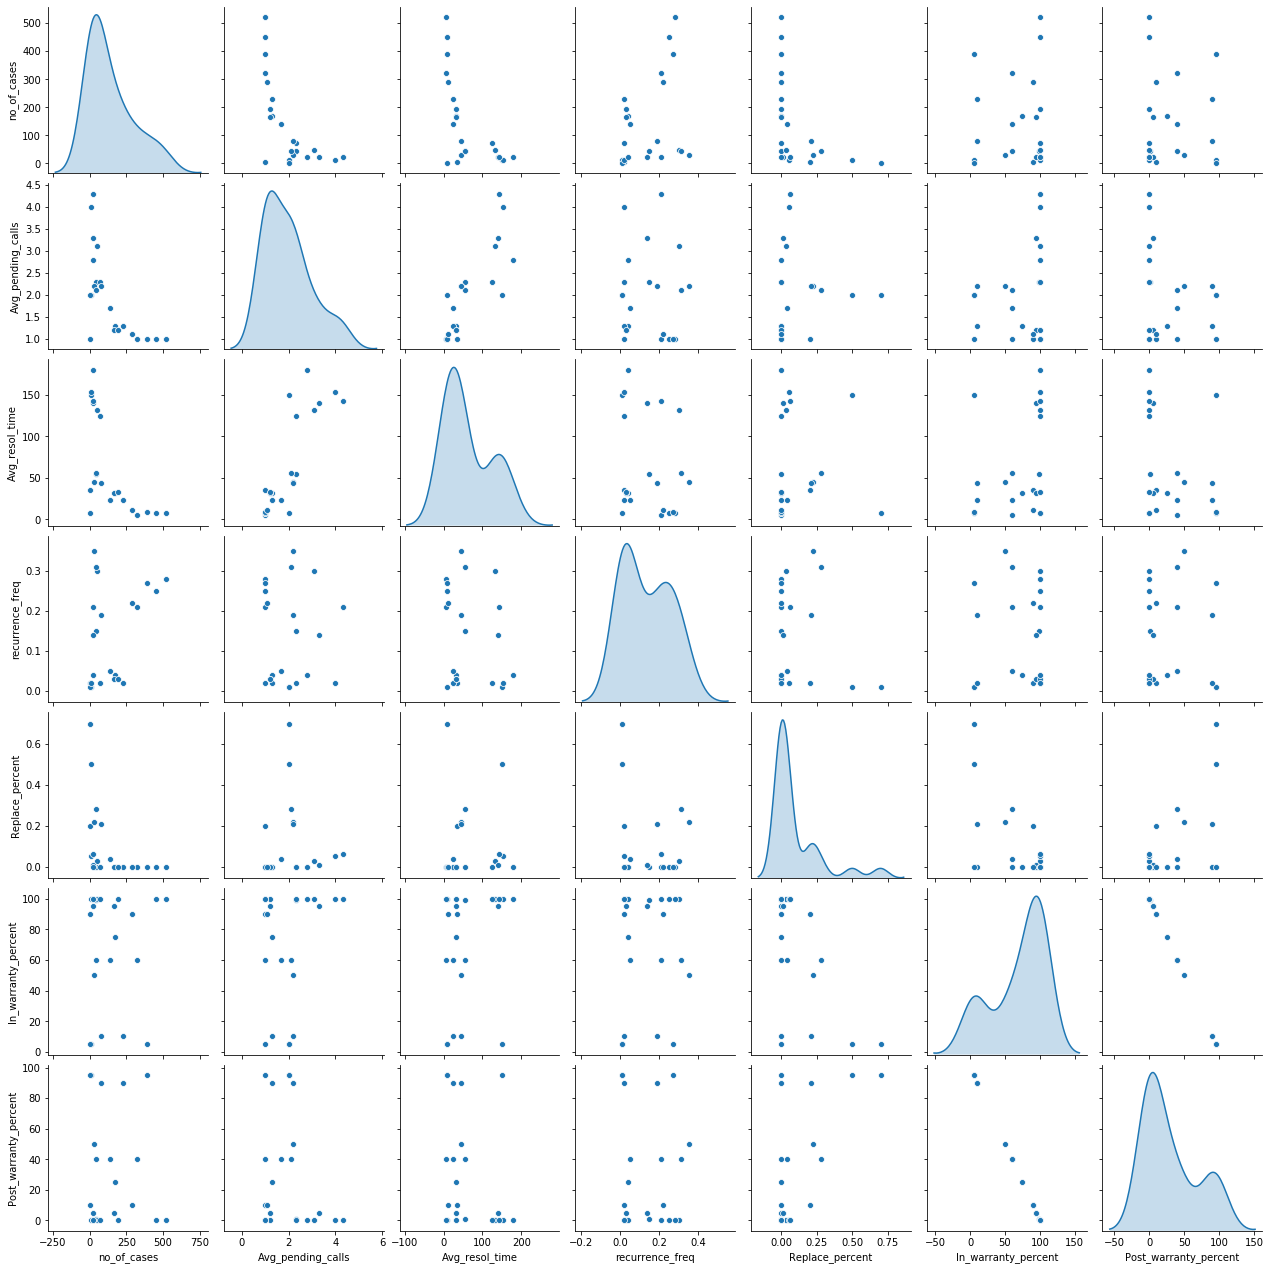

In [18]:
sns.pairplot(df,diag_kind='kde')

There is correlation between Avg_pending_cols and AVg_resol_time and vice versa.

Also, In_warranty_percent and post_warranty_percent are negatively correlated with each other.

### Standardizing data

In [32]:
#creating copy of original dataset
df1 = df.copy(deep=True)

#Not considering first columns "Problem type" for standardizing as it is categorical column
df1 = df.iloc[:,1:]

#Standardizing using zscore
df1_std = df1.apply(zscore)
df1_std.head()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,0.179429,-0.701207,-0.538351,-0.843188,-0.561463,0.138067,-0.138067
1,-0.862176,0.027143,1.510857,-1.101765,2.245854,-1.778204,1.778204
2,-0.908323,-1.013357,-0.486253,-1.015573,0.561463,0.548696,-0.548696
3,-0.921508,0.027143,-0.955140,-1.101765,3.368781,-1.778204,1.778204
4,-0.644625,0.339294,-0.156296,0.104930,-0.561463,0.795074,-0.795074


### Grouping Data into Similar clusters

Now, we will use K-Means clustering to group data based on their attribute. First, we need to determine the optimal number of groups. For that we conduct the knee test to see where the knee happens.

Text(0.5, 1.0, 'Selecting k with Elbow Method')

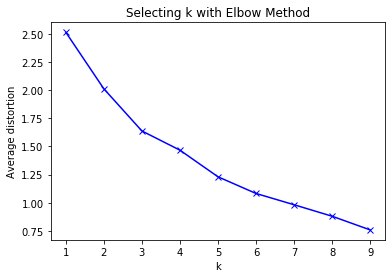

In [35]:
from scipy.spatial.distance import cdist
clusters = range(1,10)
meanDistortions = []

for k in clusters:
    km = KMeans(n_clusters= k)
    km.fit(df1_std)
    pred = km.predict(df1_std)
    meanDistortions.append(sum(np.min(cdist(df1_std,km.cluster_centers_,'euclidean'),axis =1))/df1.shape[0])

plt.plot(clusters,meanDistortions,'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with Elbow Method')

Though the bend is not coming out clearly as there are many bends, let us look at 3 clusters and 5 clusters

### Creating  Model with K=3 Cluster

In [39]:
km_final = KMeans(3)
km_final.fit(df1)
pred_km = km_final.predict(df1)

#Append the preddiction
df1['GROUP'] = pred_km
df1_std['GROUP'] = pred_km
print("Groups Assigned: \n")
df1.head(10)

Groups Assigned: 



,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,GROUP
0,170,1.3,32,0.04,0.00,75,25,2
1,12,2.0,150,0.01,0.50,5,95,1
2,5,1.0,35,0.02,0.20,90,10,1
3,3,2.0,8,0.01,0.70,5,95,1
4,45,2.3,54,0.15,0.00,99,1,1
5,47,3.1,132,0.30,0.03,100,0,1
6,12,4.0,154,0.02,0.05,100,0,1
7,165,1.2,32,0.03,0.00,95,5,2
8,321,1.0,5,0.21,0.00,60,40,0
9,22,3.3,140,0.14,0.01,95,5,1


In [41]:
df1_std.head()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,GROUP
0,0.179429,-0.701207,-0.538351,-0.843188,-0.561463,0.138067,-0.138067,2
1,-0.862176,0.027143,1.510857,-1.101765,2.245854,-1.778204,1.778204,1
2,-0.908323,-1.013357,-0.486253,-1.015573,0.561463,0.548696,-0.548696,1
3,-0.921508,0.027143,-0.955140,-1.101765,3.368781,-1.778204,1.778204,1
4,-0.644625,0.339294,-0.156296,0.104930,-0.561463,0.795074,-0.795074,1


#### Analyze the distribution of the data among the two groups (K = 3). One of the most informative visual tool is boxplot.¶

In [44]:
cluster_df = df1.groupby(['GROUP'])
cluster_df.mean()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
GROUP,,,,,,,
0,420.250000,1.000000,7.250000,0.252500,0.000000,66.250000,33.750000
1,31.923077,2.584615,97.384615,0.136154,0.173846,70.307692,29.692308
2,198.000000,1.300000,25.666667,0.065000,0.006667,71.666667,28.333333


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002309F3EFF08>,
      dtype=object)

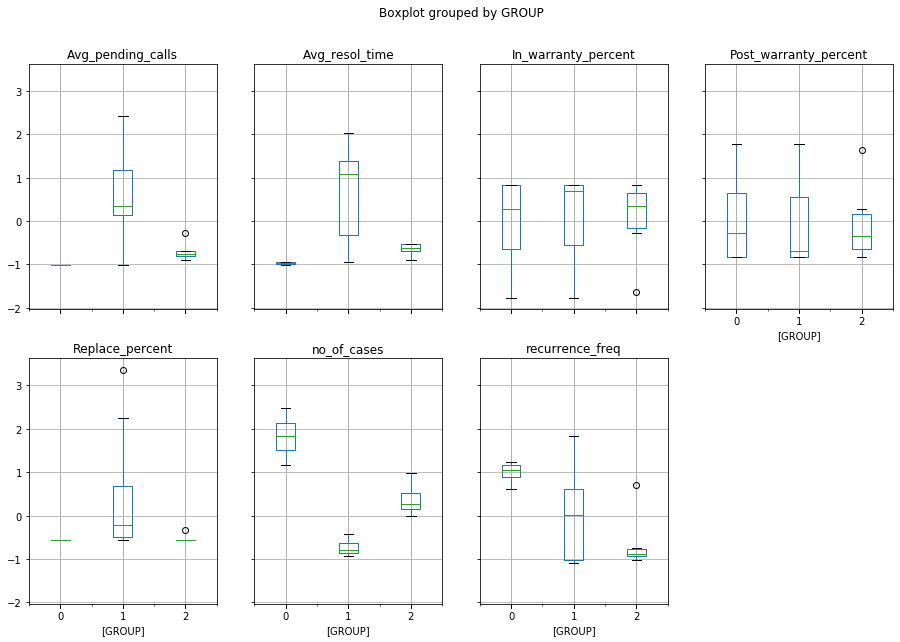

In [45]:
df1_std.boxplot(by='GROUP',layout=(2,4),figsize=(15,10))

### Creating model with K=5 clusters

In [51]:
km5 = KMeans(5)
km5.fit(df1)
pred5 = km5.predict(df1)

#Append the preddiction
df1['GROUP_2'] = pred5
df1_std['GROUP_2'] = pred5
print("Groups Assigned: \n")
df1.head(20)

Groups Assigned: 



,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,GROUP,GROUP_2
0,170,1.3,32,0.04,0.00,75,25,2,2
1,12,2.0,150,0.01,0.50,5,95,0,3
2,5,1.0,35,0.02,0.20,90,10,0,3
3,3,2.0,8,0.01,0.70,5,95,0,3
4,45,2.3,54,0.15,0.00,99,1,0,3
5,47,3.1,132,0.30,0.03,100,0,0,1
6,12,4.0,154,0.02,0.05,100,0,0,1
7,165,1.2,32,0.03,0.00,95,5,2,2
8,321,1.0,5,0.21,0.00,60,40,1,4
9,22,3.3,140,0.14,0.01,95,5,0,1


In [52]:
cluster_df_5 = df1.groupby(['GROUP_2'])
cluster_df_5.mean()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,GROUP
GROUP_2,,,,,,,,
0,485.000000,1.000000,7.500000,0.265000,0.000000,100.000000,0.000000,1.0
1,33.333333,3.300000,145.666667,0.121667,0.025000,99.166667,0.833333,0.0
2,167.000000,1.350000,30.000000,0.037500,0.010000,82.500000,17.500000,2.0
3,30.714286,1.971429,56.000000,0.148571,0.301429,45.571429,54.428571,0.0
4,307.750000,1.100000,12.000000,0.180000,0.000000,41.250000,58.750000,1.5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002309B3D03C8>,
      dtype=object)

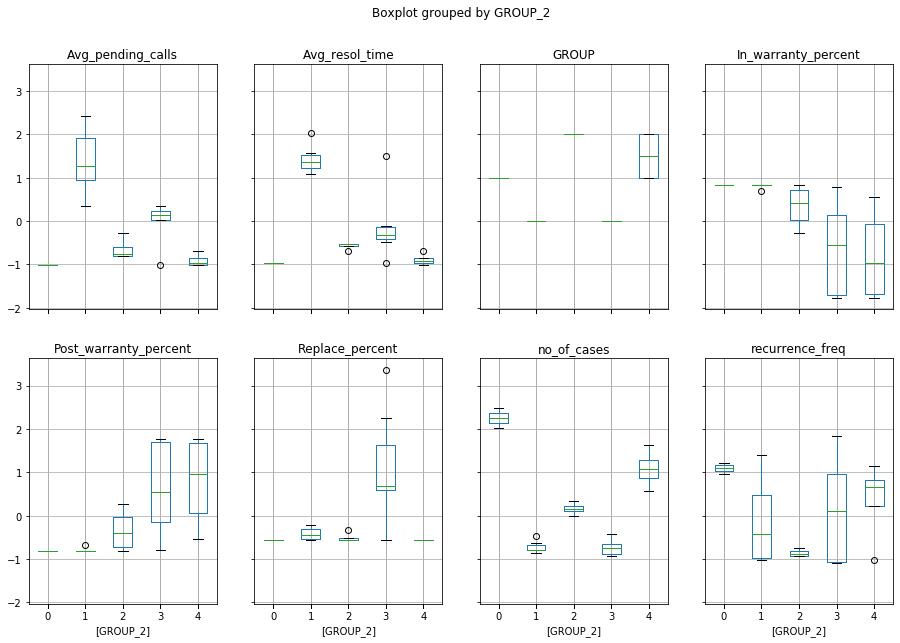

In [53]:
df1_std.boxplot(by='GROUP_2',layout=(2,4),figsize=(15,10))

### Conclusion and Interpretation

Here we have created 3 (0,1,2) clusters and 5(0,1,2,3,4) clusters and grouped data similar data together in type of clusters.